# 🎓 Student Performance Prediction
This project predicts students' exam scores based on study-related and demographic factors using machine learning models.


## 🔍 Step 1: Define the Problem¶
Can we predict a student’s exam score based on study habits, attendance, and background factors?
This task is suitable for supervised learning because we have labeled data (exam scores) to train the model.


In [182]:
# Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error , r2_score

## 📂 Step 2: Load and Explore Data Analysis (EDA)
We use a student performance dataset with features such as study habits, attendance, access to resources, and lifestyle factors.

For this analysis, we select only the following columns: [Hours_Studied , Attendance , Access_to_Resources , Extracurricular_Activities, Sleep_Hours , Previous_Scores , Internet_Access , Tutoring_Sessions , Peer_Influence , Physical_Activity]

These variables will be used to predict the Exam_Score.

In [183]:
file_path = '/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv'
data = pd.read_csv(file_path)

In [184]:
data.info

<bound method DataFrame.info of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_

In [185]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [186]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Extracurricular_Activities', ylabel='Count'>

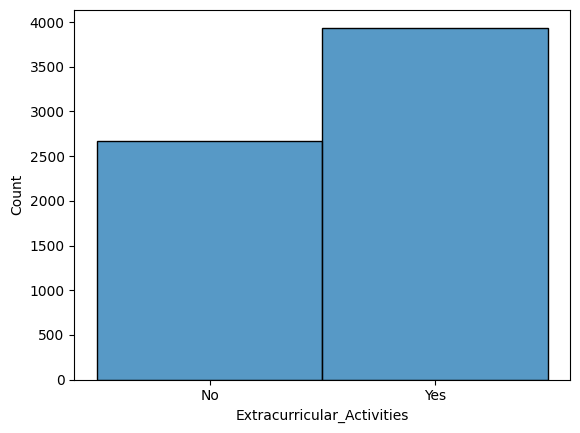

In [187]:
sns.histplot(data['Extracurricular_Activities'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Access_to_Resources', ylabel='Count'>

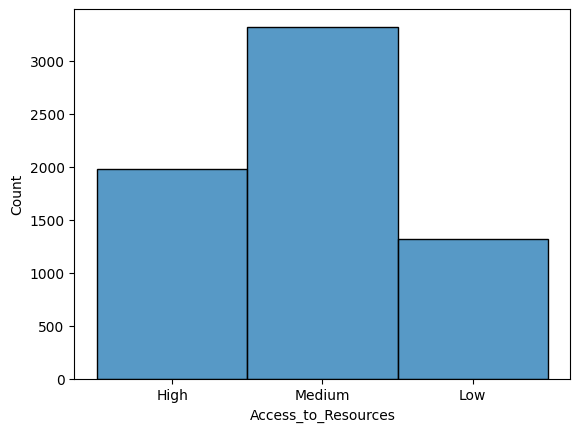

In [188]:
sns.histplot(data['Access_to_Resources'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Parental_Involvement', ylabel='Count'>

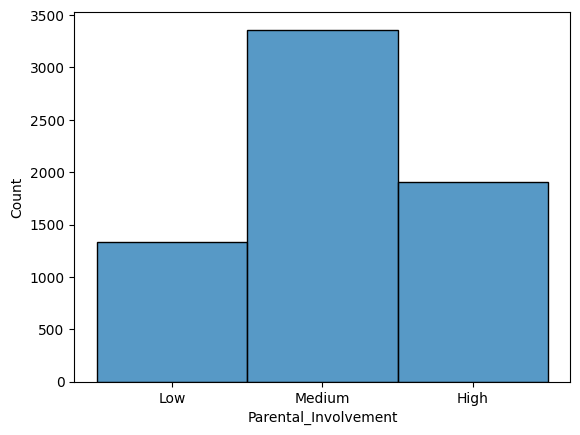

In [189]:
sns.histplot(data['Parental_Involvement'])

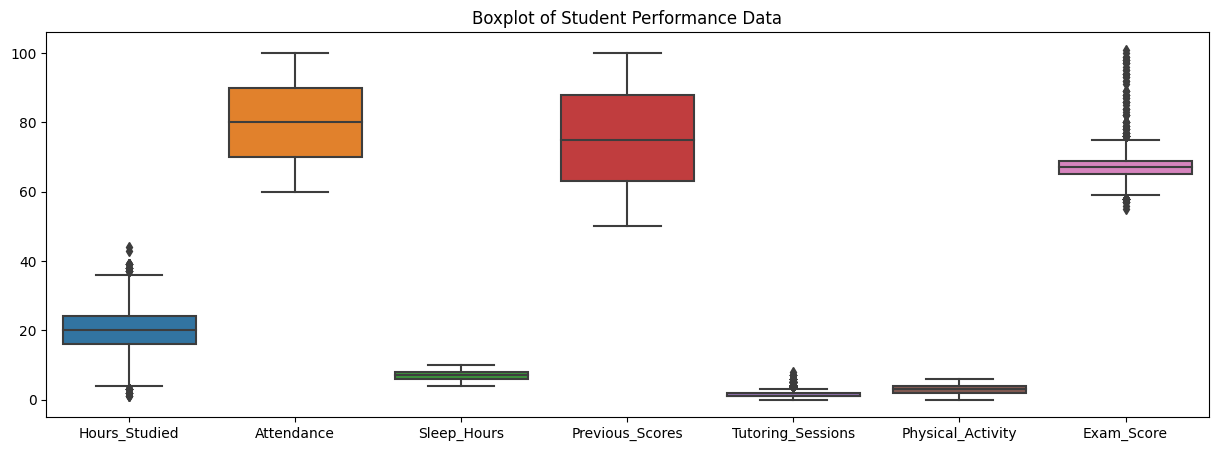

In [190]:
plt.figure(figsize=(15, 5))
plt.title('Boxplot of Student Performance Data')
sns.boxplot(data = data)  
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


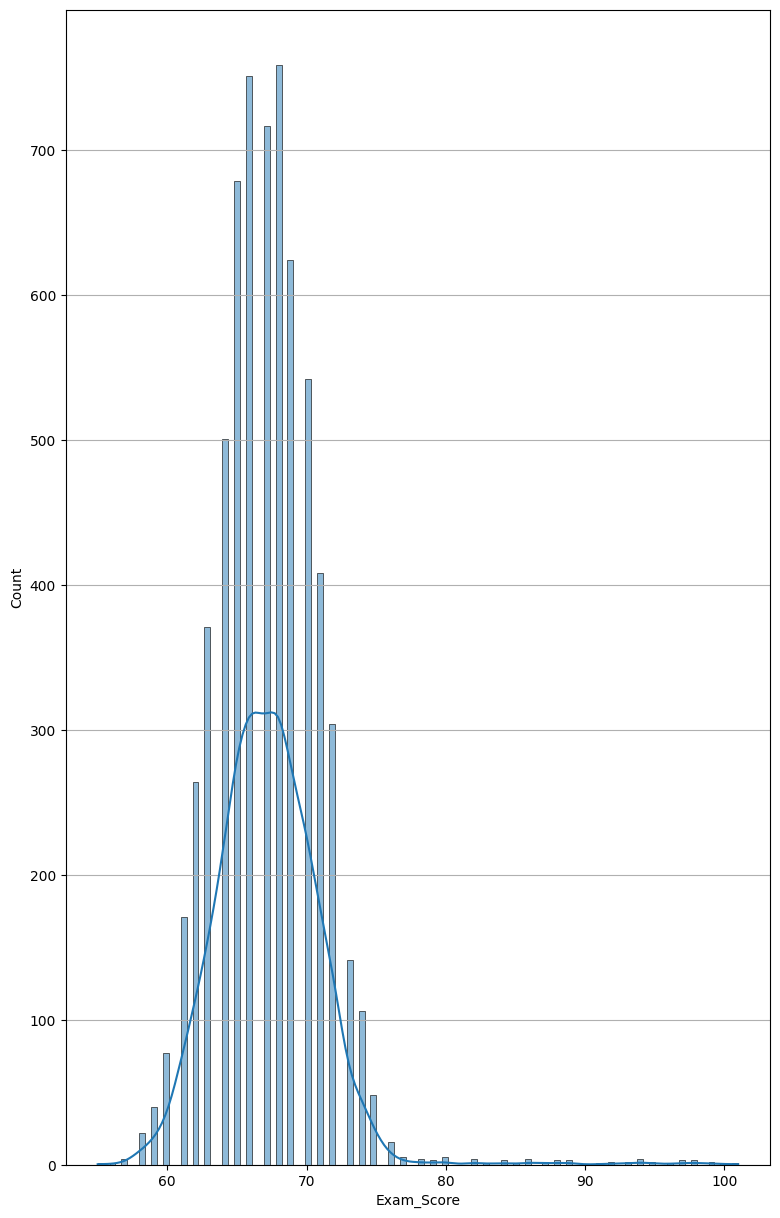

In [191]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.histplot(data['Exam_Score'],kde=True)
plt.grid(axis='y')

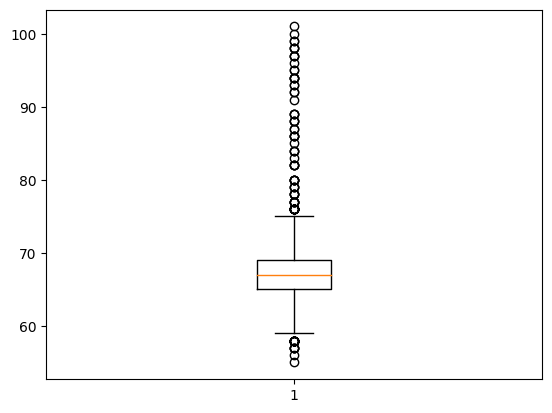

In [192]:
plt.boxplot(data['Exam_Score'])
plt.show()

## 🛠 Data Preprocessing
- Handled missing values.
- Encoded categorical variables using **One-Hot Encoding**.
- Scaled numerical features.

In [193]:
data = data.replace([np.inf, -np.inf], np.nan)

In [194]:
data = data.dropna()

In [195]:
Data = data[['Hours_Studied',	'Attendance' , 'Access_to_Resources' ,'Extracurricular_Activities','Sleep_Hours','Previous_Scores',	'Internet_Access','Tutoring_Sessions' ,'Peer_Influence'	, 'Physical_Activity']]

In [196]:
numerical_columns = data.select_dtypes(include=['number'])
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

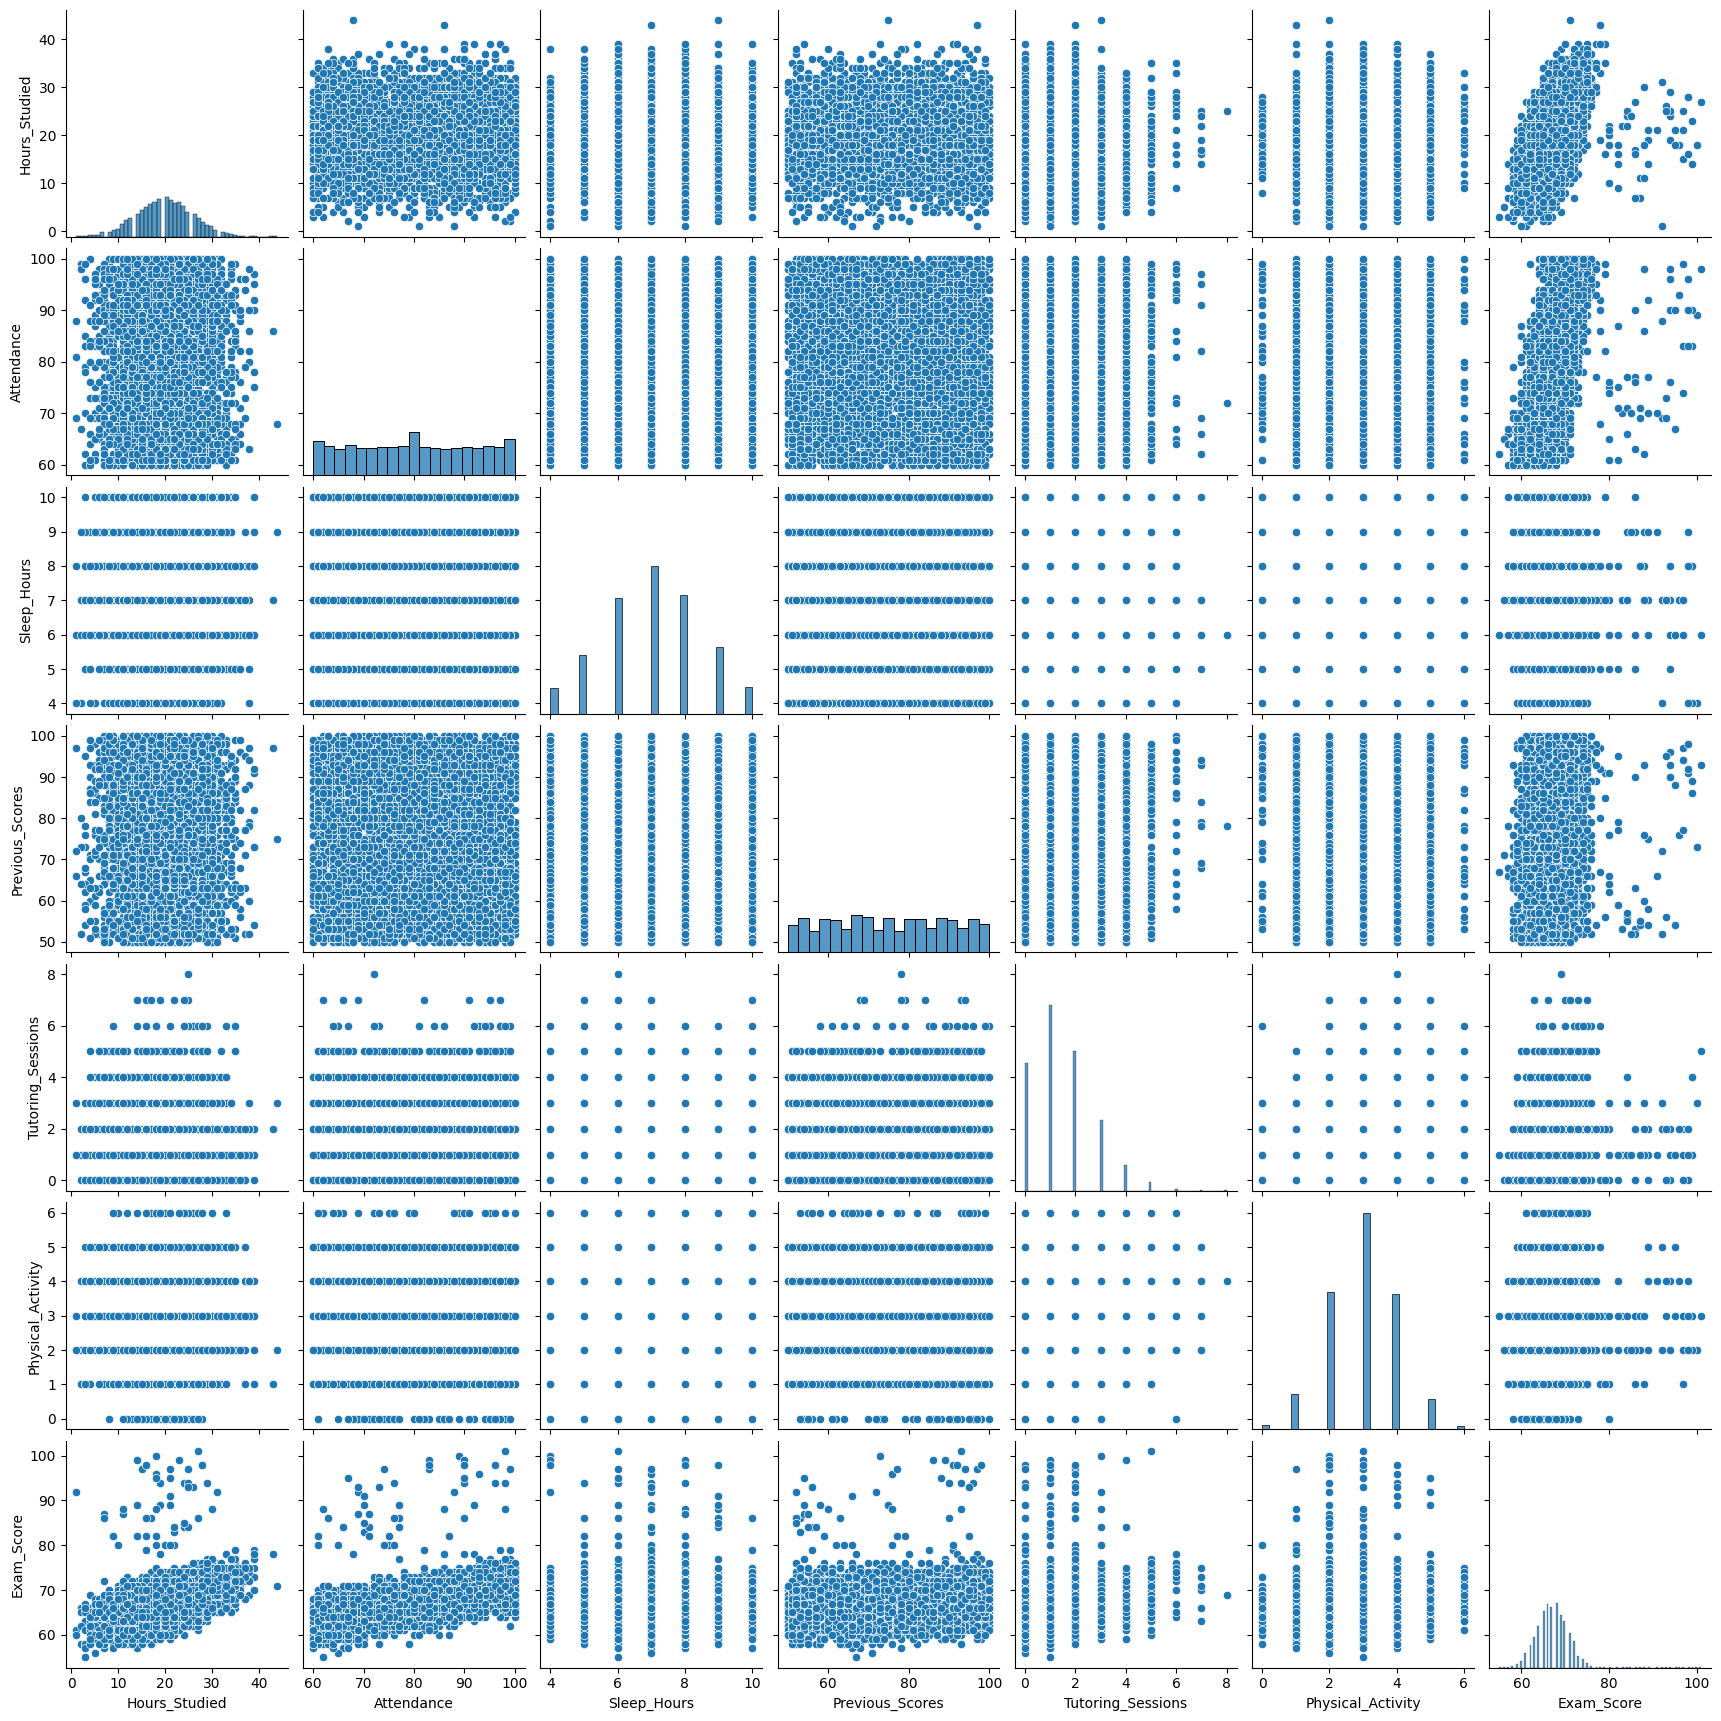

In [197]:
sns.pairplot(numerical_columns)

In [198]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

one_hot_df = pd.DataFrame(
    one_hot_encoded, 
    columns=encoder.get_feature_names_out(categorical_columns),
    index=data.index
)

df_encoded = pd.concat([data, one_hot_df], axis=1)
df_encoded = df_encoded.drop(columns=categorical_columns)

df_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19,64,8,59,2,4,61,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,24,98,7,91,2,4,74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29,89,8,98,1,4,71,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19,92,6,65,3,4,70,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [199]:
X = df_encoded.drop(columns=['Exam_Score'])
y = df_encoded['Exam_Score']

## 🤖 Step 3 Model Training
We trained the following models:
1. Linear Regression

In [200]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)


In [201]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## 📈 Step 4 Model Evaluation & Visualization

We used the following metrics:
- **R² Score**: Measures how much variance is explained by the model.
- **RMSE**: Root Mean Squared Error (lower is better).
- **MAE**: Mean Absolute Error.

In [202]:
y_prediction = model.predict(X_train)
print('The Mean Squared Error = ' , mean_squared_error(y_train,y_prediction))
print('The R^2  = ' , r2_score(y_train,y_prediction)*100 , '%')

The Mean Squared Error =  4.292350891021519
The R^2  =  71.8781371910891 %


In [203]:
y_Predict = model.predict(X_test)

In [204]:
print('The Mean Squared Error = ' , mean_squared_error(y_test,y_Predict))
print('The R^2  = ' , r2_score(y_test,y_Predict)*100 , '%')

The Mean Squared Error =  4.173261787518073
The R^2  =  73.14386698897842 %


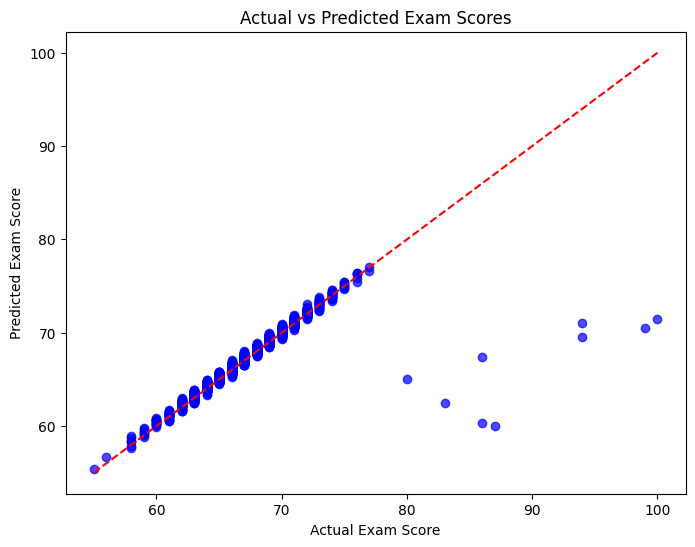

In [205]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_Predict, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

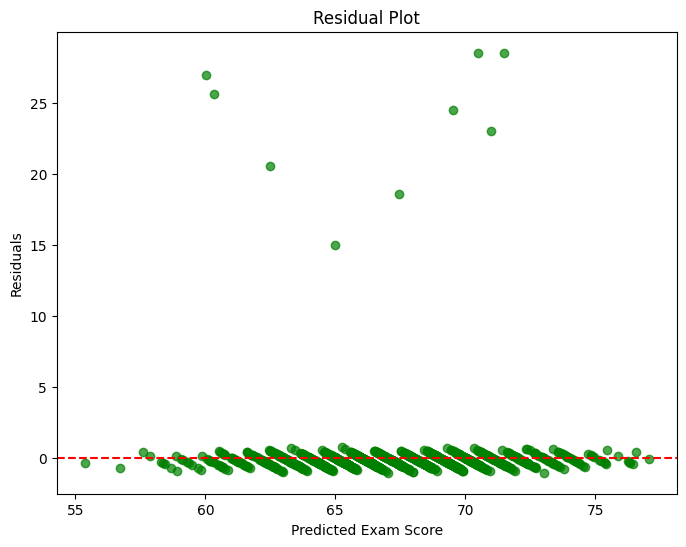

In [206]:
residuals = y_test - y_Predict

plt.figure(figsize=(8,6))
plt.scatter(y_Predict, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## 📂 Step 5: Save Predictions to CSV

After making predictions, we combine them with the test dataset features and export the results to a CSV file for further analysis or sharing.


In [207]:
X_test_df = pd.DataFrame(X_test, columns=['Hours_Studied',	'Attendance' , 'Access_to_Resources' ,'Extracurricular_Activities','Sleep_Hours','Previous_Scores',	'Internet_Access','Tutoring_Sessions' ,'Peer_Influence'	, 'Physical_Activity'])
output = X_test_df.copy()
output['Performance score'] = y_Predict
output.to_csv('prediction.csv', index=False)
print("CSV file saved successfully!")

CSV file saved successfully!
